# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [3]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding = 'latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,16236.000000,16253.000000,16238.000000,16249.000000,16253.000000,16221.000000,10657.000000,10655.000000,10644.000000,10656.000000,10650.000000,10640.000000,5.178000e+03,4499.000000,4.343000e+03
mean,33.596945,25.814680,13.760184,21.133270,4.467212,1.449728,35.680304,27.455279,10.007657,13.639968,9.249953,2.254041,4.129494e+07,0.703416,6.636071e+06
std,23.781350,24.558786,17.845975,23.784604,10.186693,8.437395,19.364950,17.450835,10.458430,9.947624,12.429025,10.302431,1.965335e+09,0.486681,4.293996e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000030,-7.351631e+01
25%,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,25.000000,15.000000,5.000000,10.000000,0.000000,0.000000,5.000000e+04,0.058444,2.036942e+04
50%,30.000000,20.000000,10.000000,15.000000,0.000000,0.000000,30.000000,30.000000,10.000000,10.000000,5.000000,0.000000,9.000000e+04,1.000000,5.381217e+04
75%,50.000000,35.000000,20.000000,40.000000,5.000000,0.000000,50.000000,40.000000,10.000000,15.000000,15.000000,0.000000,1.900000e+05,1.000000,9.566608e+04
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,1.000000e+11,2.652053,2.829740e+10


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [4]:
#Your code here
import flatiron_stats as fs

In [7]:
df.FormalEducation.value_counts
# we'll be using Master's degree and Bachelor's degree

<bound method IndexOpsMixin.value_counts of 0                                        Bachelor's degree
1                                          Master's degree
2                                          Master's degree
3                                          Master's degree
4                                          Doctoral degree
                               ...                        
26389                                      Master's degree
26390                                    Bachelor's degree
26391                                                  NaN
26392                               I prefer not to answer
26393    I did not complete any formal education past h...
Name: FormalEducation, Length: 26394, dtype: object>

In [11]:
# next, name our sub-sets of data
edu = 'FormalEducation'
comp = 'AdjustedCompensation'

master = "Master's degree"
bach = "Bachelor's degree"

subset = df[(~df[edu].isnull()) & (~df[comp].isnull())]
master_subset = subset[subset[edu]==master][comp]
bach_subset = subset[subset[edu]==bach][comp]

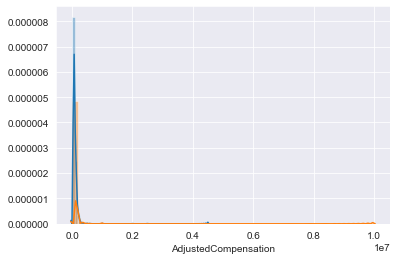

In [12]:
sns.distplot(master_subset)
sns.distplot(bach_subset)

In [15]:
print(master_subset.mean())
print(bach_subset.mean())
print(master_subset.median())
print(bach_subset.median())
# means are only $5k apart, but medians are $15k apart
# this suggests the bachelor category has some outliers
# we can also see that from the graph above (but not in a helpful way)

69139.89987120005
64887.09799461879
53812.17000000001
38399.4


In [16]:
fs.p_value_welch_ttest(master_subset, bach_subset)

0.33077639451272267

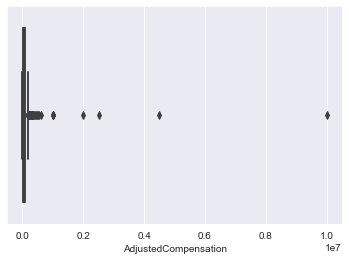

In [19]:
display(sns.boxplot(master_subset))
display(sns.boxplot(bach_subset))
# looks like we have a dot showing that someone(s) makes $1 million
# let's limit this to $500k

In [22]:
outlier_threshold = 500000
master_subset = subset[(subset[edu]==master) & (subset[comp]<=outlier_threshold)][comp]
bach_subset = subset[(subset[edu]==bach) & (subset[comp]<=outlier_threshold)][comp]

AxesSubplot(0.125,0.125;0.775x0.755)


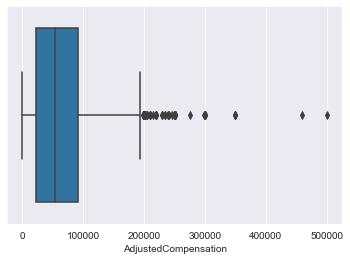

In [24]:
print(sns.boxplot(master_subset))

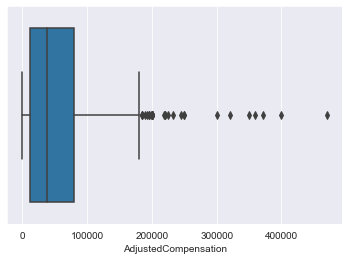

In [25]:
display(sns.boxplot(bach_subset))

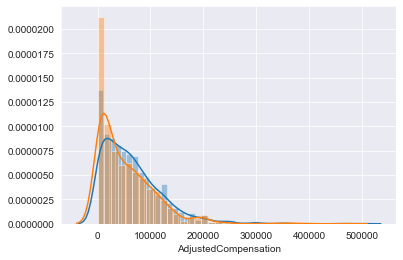

In [26]:
sns.distplot(master_subset)
sns.distplot(bach_subset)
# much better!
# that's why the median bach is so far below - there's a spike!

In [27]:
print(master_subset.mean())
print(bach_subset.mean())
print(master_subset.median())
print(bach_subset.median())
fs.p_value_welch_ttest(master_subset, bach_subset)
# these are not that different!

63976.63281797891
53744.35038988485
53539.72
38292.15


4.4874583271514723e-07

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [29]:
#Your code here
edu = 'FormalEducation'
comp = 'AdjustedCompensation'

doctor = "Doctoral degree"
bach = "Bachelor's degree"

outlier_threshold = 500000
doc_subset = subset[(subset[edu]==doctor) & (subset[comp]<=outlier_threshold)][comp]
bach_subset = subset[(subset[edu]==bach) & (subset[comp]<=outlier_threshold)][comp]

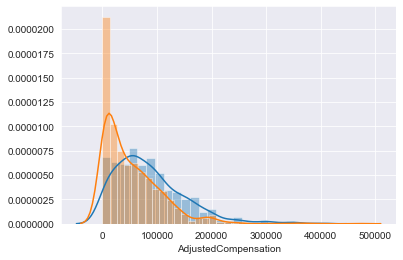

In [30]:
sns.distplot(doc_subset)
sns.distplot(bach_subset)
# these look much more different than the plots above

In [31]:
print(master_subset.mean())
print(doc_subset.mean())
print(master_subset.median())
print(doc_subset.median())
fs.p_value_welch_ttest(master_subset, doc_subset)
# yes, these are statistically different

63976.63281797891
86194.98163085166
53539.72
73152.77


0.0

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = '{} ~ C({})'.format(f2, f1)
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [33]:
temp = df[df[f2]<=5*10**5]
formula = '{} ~ C({})'.format(f2, f1)
lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!